In [364]:
# import library
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np

In [365]:
# menyimpan dataset train dan test dalam variabel yang berbeda
df_test = pd.read_excel('kelulusan_test.xls')
df_train = pd.read_excel('kelulusan_train.xls')

# cetak 5 baris dataset train   
df_train.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [366]:
# cari nilai kosong pada setiap kolom
print('Dataset Train:')
print(df_train.isnull().sum())

print('\nDataset Test:')
print(df_test.isnull().sum())

Dataset Train:
NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               7
IPK                 3
STATUS KELULUSAN    0
dtype: int64

Dataset Test:
NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               4
IPK                 3
STATUS KELULUSAN    0
dtype: int64


In [367]:
# cari nilai 0 pada setiap kolom
print('Dataset Train:')
print((df_train == 0).sum())

print('\nDataset Test:')
print((df_test == 0).sum())

Dataset Train:
NAMA                  0
JENIS KELAMIN         0
STATUS MAHASISWA      0
UMUR                  0
STATUS NIKAH          0
IPS 1                 0
IPS 2                 0
IPS 3                 0
IPS 4                 1
IPS 5                 0
IPS 6                 2
IPS 7                 3
IPS 8               164
IPK                   0
STATUS KELULUSAN      0
dtype: int64

Dataset Test:
NAMA                 0
JENIS KELAMIN        0
STATUS MAHASISWA     0
UMUR                 0
STATUS NIKAH         0
IPS 1                0
IPS 2                0
IPS 3                0
IPS 4                0
IPS 5                0
IPS 6                1
IPS 7                2
IPS 8               44
IPK                  0
STATUS KELULUSAN     0
dtype: int64


In [368]:
# mencari baris duplikat berdasarkan kolom IPS 1 hingga IPS 8
duplikat = df_train[df_train.duplicated(subset=['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8'], keep=False)]
duplikat

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
334,ZIDNI ILMA,LAKI - LAKI,MAHASISWA,25,BELUM MENIKAH,2.57,3.02,3.13,3.25,3.29,3.58,1.91,4.0,3.24,TEPAT
335,FADLULLOH,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,2.57,3.02,3.13,3.25,3.29,3.58,1.91,4.0,3.53,TEPAT
348,NOVITA ARYUNINGRUM,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.26,3.06,3.27,3.52,2.77,3.55,2.64,3.5,3.37,TEPAT
349,NURUL MISBAH,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.26,3.06,3.27,3.52,2.77,3.55,2.64,3.5,2.93,TEPAT
355,ALI AKBAR DAROJAT,LAKI - LAKI,MAHASISWA,26,BELUM MENIKAH,2.98,2.66,2.70,2.73,2.80,3.33,2.43,0.0,2.83,TEPAT
356,ITA SEPTIARINIE,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,2.98,2.66,2.70,2.73,2.80,3.33,2.43,0.0,1.90,TEPAT
357,DHANANG HERY WIBISONO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,3.02,2.88,2.45,2.14,3.24,3.41,3.20,4.0,3.10,TEPAT
358,NORMA FITRIYANI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.88,2.45,2.14,3.24,3.41,3.20,4.0,2.81,TEPAT
375,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT


In [369]:
# menghapus baris data yang kosong
df_train = df_train.dropna()
df_test = df_test.dropna()

In [370]:
# mengecek kembali nilai kosong
print('Dataset Train:')
print(df_train.isnull().sum())

print('\nDataset Test:')
print(df_test.isnull().sum())

Dataset Train:
NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 0
STATUS KELULUSAN    0
dtype: int64

Dataset Test:
NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 0
STATUS KELULUSAN    0
dtype: int64


In [371]:
# menghapus kolom nama karena tidak dipakai
df_train = df_train.drop('NAMA', axis=1)
df_test = df_test.drop('NAMA', axis=1)

In [372]:
# mengubah nilai data kategorikal menjadi binary
df_train = df_train.replace({'TEPAT': 1, 'TERLAMBAT': 0, 'MENIKAH': 1, 'BELUM MENIKAH': 0,
                             'MAHASISWA':1, 'BEKERJA':0, 'PEREMPUAN':0, 'LAKI - LAKI':1})

df_test = df_test.replace({'TEPAT': 1, 'TERLAMBAT': 0, 'MENIKAH': 1, 'BELUM MENIKAH': 0,
                             'MAHASISWA':1, 'BEKERJA':0, 'PEREMPUAN':0, 'LAKI - LAKI':1})

C:\Users\M salim\AppData\Local\Temp\ipykernel_18192\1483176928.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train = df_train.replace({'TEPAT': 1, 'TERLAMBAT': 0, 'MENIKAH': 1, 'BELUM MENIKAH': 0,
C:\Users\M salim\AppData\Local\Temp\ipykernel_18192\1483176928.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test = df_test.replace({'TEPAT': 1, 'TERLAMBAT': 0, 'MENIKAH': 1, 'BELUM MENIKAH': 0,


In [373]:
# data preprocessing
# data train
X_train = df_train.drop('STATUS KELULUSAN', axis=1)  # Features
y_train = df_train['STATUS KELULUSAN']              # Target

# data test
X_test = df_test.drop('STATUS KELULUSAN', axis=1)   # Features
y_test = df_test['STATUS KELULUSAN']                # Target

In [374]:
# normalisasi standardscaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [375]:
# uji beberapa nilai k
k_values = range(1, 21)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    scores.append(np.mean(cv_scores))

# pilih k terbaik
best_k = k_values[np.argmax(scores)]
print(f"Best k: {best_k}, Accuracy: {max(scores):.2f}")


Best k: 19, Accuracy: 0.89


In [376]:
# training model
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

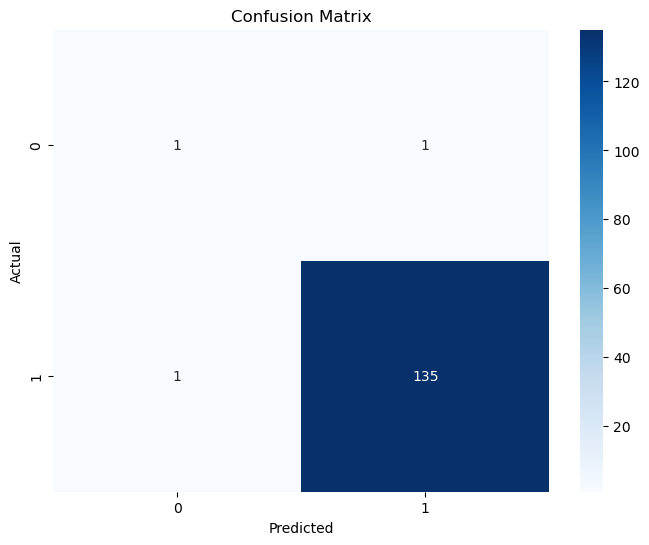

In [377]:
# melakukan prediksi
y_pred = knn.predict(X_test)

# menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

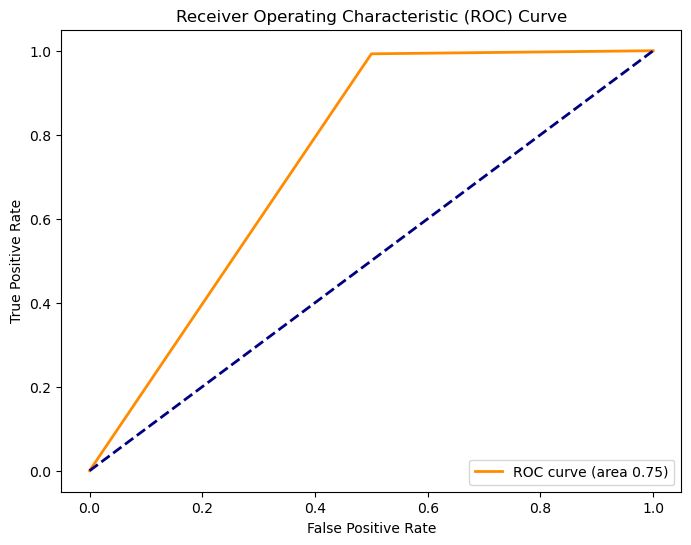

In [378]:
# menghitung nilai false positive rate (fpr) dan true positive rate (tpr) untuk kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Visualisasi kurva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area {:.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [379]:
# Evaluasi Model
y_pred = knn.predict(X_test)

# Confusion Matrix dan Classification Report
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[  1   1]
 [  1 135]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.99      0.99      0.99       136

    accuracy                           0.99       138
   macro avg       0.75      0.75      0.75       138
weighted avg       0.99      0.99      0.99       138

